In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

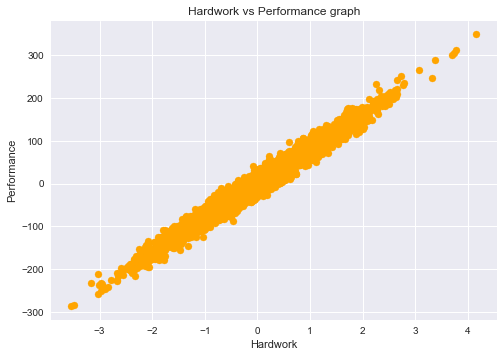

In [8]:
X=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

#Convert into numpy arrays

X=X.values
y=y.values
#print(X.shape)

#Normalisation
u=X.mean()
std=X.std()
X=(X-u)/std

#Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()



In [18]:
#Linear Regression
def hypothesis(x,theta):
    y_=theta[0]+theta[1]*x
    return y_


def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    return grad/m

def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_-Y[i])**2
    return (total_error/m)

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)[0]
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
    return theta,error_list,theta_list
        
    

In [19]:
theta,error_list,theta_list=gradientDescent(X,y)

In [20]:
theta

array([ 0.6838508 , 79.90361453])

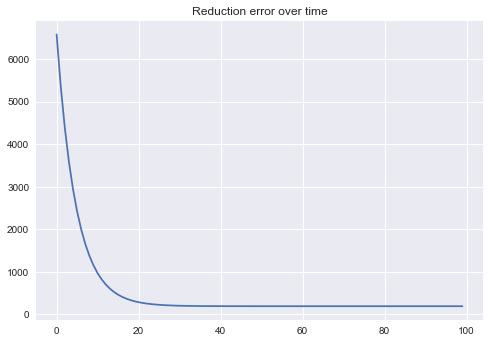

In [21]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [22]:
#Predictions and best line

In [23]:
y_=hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


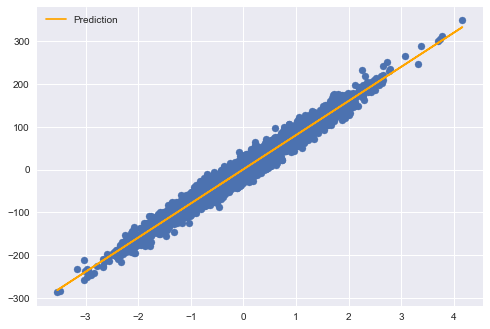

In [32]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [28]:
#Computing Score

In [29]:
def scores(Y,Y_):
    num=np.sum((Y-Y_)**2)
    denom=np.sum((Y-Y.mean())**2)
    score=(1-num/denom)
    return score*100

In [30]:
scores(y,y_)

97.09612226971643